# Harmonic Oscillator - Quantum Mechanics Approach

While giving a good overview of the molecular vibrations, the classical model 
doesn’t describes the quantised observed 
vibrations. As a first approximation, a 
quadratic harmonic potential can 
approximate the potential of a diatomic 
oscillator. The main results are:
    
* The vibration levels are quantised ($n$)
* Can only give a probability for finding the  nuclei in a certain arrangement
* Nuclear tunnelling
* There is a so-called zero-point energy

In [1]:
%pylab inline
import seaborn as sns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


The mathematica approach is using the Hamiltonian operator of quantum mechanics:

$$
\hat{H} = \frac{\hbar}{2m}\nabla^2 + \frac{1}{2}k \hat{x}^2 
$$

Using the Schrödinger equation:
 
$$
\Psi \hat{H} = E \Psi 
$$

Then, we obtain a quatizied set or energy levels:


$$
E = h \omega_i (n_i +\frac{1}{2})
$$



But, what does it represen $n$ furthermore of the quantization number?

$n$ represents the each one of the normal modes. Since the normal modes are related with a determined frequency ($\omega_i$) and this directly related to the energy, we can see that each excitation of each normal mode will requiere a diffent energy 




    
 `````{admonition} Normal Modes
:class: tip 

 A normal mode of an oscillating system is a pattern of motion in which all parts of the system move sinusoidally with the same frequency. The frequencies of the normal modes of a system are known as its natural frequencies or resonant frequencies. A physical object, such as a building or bridge, has a set of normal modes (and frequencies) that depend on its structure and composition.


`````   
    

In [2]:
e          = 1.602e-19              # 1 eV = 1.602e-19 J
ħ          = 0.658                  # [eV fs]
c          = 3e8                    # [m/s]
massfactor = e/c/c                  # 1 eV/c^2 = 1.79e-36 kg
me         = 9.109e-31/massfactor   # [eV/c^2] = 0.5x10^6 eV/c^2   
c_nmfs     = 299.792458             # [nm/fs]
Eλ         = ħ*ħ*c_nmfs*c_nmfs/2/me # eV nm^2

# Number of points in the mesh
N    = 2**12+1
xinf = 100.0             # nm
ℓ    = 1.0               # nm
α    = 1.0

x    = linspace(-xinf,xinf,N)
Δx   = x[1]-x[0]

V0   = 2.0              # eV

V        = α*x*x 


Mdd      = 1./(Δx*Δx)*( diag(ones(N-1),-1) -2*diag(ones(N),0) + diag(ones(N-1),1))
H        = -Eλ*Mdd + diag(V)
E,ψT     = eigh(H)
ψ        = transpose(ψT)

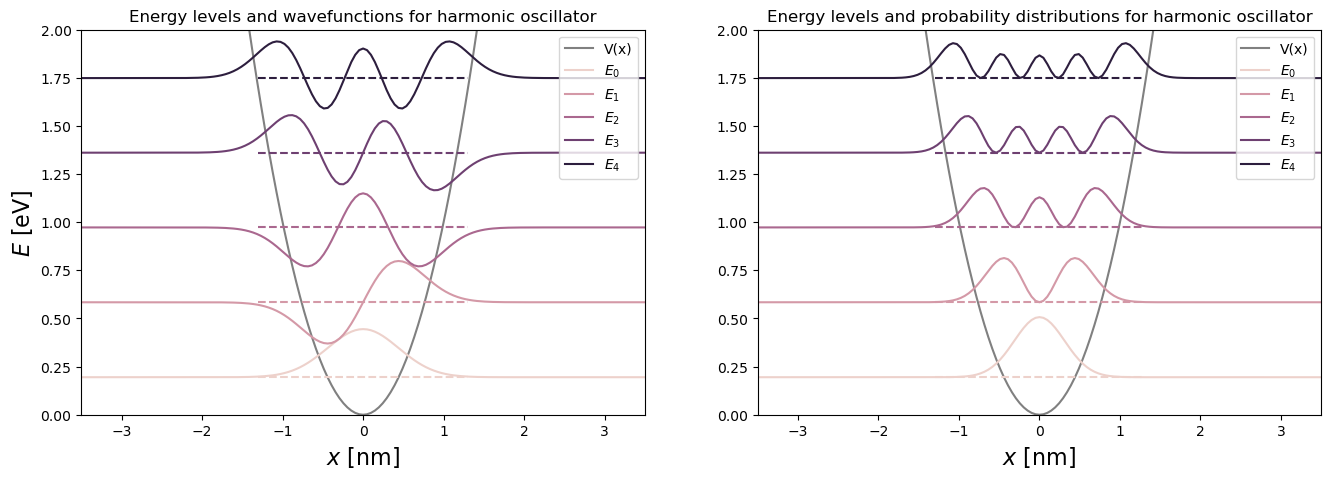

In [3]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(16,5),
                       gridspec_kw = {'wspace':0.2, 'hspace':0, 'width_ratios': [1, 1]})
a= 3.5
ax[0].set_xlim(-a*ℓ,a*ℓ)
ax[1].set_xlim(-a*ℓ,a*ℓ)

ax[0].plot(x,V,c="Gray",label="V(x)")
ax[1].plot(x,V,c="Gray",label="V(x)")

index = E<V0
itera = [i for i, x in enumerate(index) if x]

num_shades = len(itera)
color_list = sns.cubehelix_palette(num_shades)

for i in itera:
    ax[0].plot(x,E[i]+ψ[i],label=r"$E_{0}$".format(i),c=color_list[i])
    ax[1].plot(x,E[i]+5*ψ[i]*ψ[i],label=r"$E_{0}$".format(i),c=color_list[i])

for i in itera:
    ax[0].plot([-1.3*ℓ,1.3*ℓ],[E[i],E[i]],'--',c=color_list[i])
    ax[1].plot([-1.3*ℓ,1.3*ℓ],[E[i],E[i]],'--',c=color_list[i])

ax[0].set_xlabel("$x$ [nm]",fontsize=16)
ax[0].set_ylabel("$E$ [eV]",fontsize=16)
ax[0].legend(loc=1)
ax[0].set_ylim(0,V0)
ax[1].set_xlabel("$x$ [nm]",fontsize=16)

ax[1].legend(loc=1)
ax[1].set_ylim(0,V0)

ax[0].set_title("Energy levels and wavefunctions for harmonic oscillator")
ax[1].set_title("Energy levels and probability distributions for harmonic oscillator")


fig.savefig("armonic_oscilator.jpg")

In the reality, the potential is anharmonic, the solutions differ from the harmonic  potential approximation described earlier

Departure from the harmonic oscillator induce:
* No equal spacing in the vibrational  modes
* Real frequency are lower than the  harmonic frequency
* Overtones are allowed
* We find an energy for the dissociation of the molecule ($E_D$)

In this case the energy levels can be descrbied as:

$$
E = h \omega (n+\frac{1}{2})  -\frac{h^2 \omega^2}{4E_D} (n+\frac{1}{2})^2 
$$
    

In [4]:
from pylab import *
from ipywidgets import *

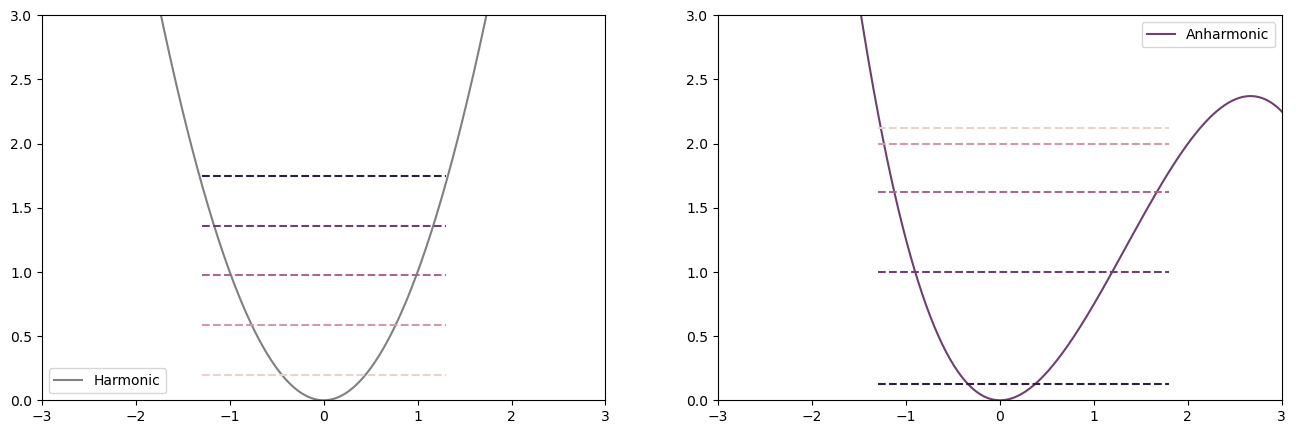

In [5]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(16,5),
                       gridspec_kw = {'wspace':0.2, 'hspace':0, 'width_ratios': [1, 1]})
k, γ= 1, -1/4
x1 = linspace(-7,7,1001)
x2 = linspace(-7,7,1001)
y1 = k*x1**2+γ*x1**3
y2 = k*x2**2
x=linspace(0,2.0,5)
E_an=2+(0.5*(x+0.5)-0.5*(x+0.5)**2)



ax[0].set_ylim(0,3)
ax[0].set_xlim(-3,3)
ax[1].set_ylim(0,3)
ax[1].set_xlim(-3,3)
ax[1].plot(x1,y1, label="Anharmonic", c= color_list[3])
ax[0].plot(x1,y2, label="Harmonic", c="Gray")
for i in itera:
    ax[0].plot([-1.3*ℓ,1.3*ℓ],[E[i],E[i]],'--',c=color_list[i])
    ax[1].plot([-1.3*ℓ,1.8*ℓ],[E_an[i],E_an[i]],'--',c=color_list[i])
 

ax[0].legend()
ax[1].legend()

```{figure} Symmetric_stretching_mode-2.gif
---
width: 200%
figclass: margin
name: Molecules
---
Symmetric stretching mode
```

```{figure} Antisymmetric_stretching_mode-1.gif
---
width: 200%
figclass: margin
name: Molecules
---
Antisymmetric stretching mode
```


```{figure} Bending_mode-3.gif
---
width: 200%
figclass: margin
name: Molecules
---
In plane bending mode 
```

# Normal modes

Each atom of  a molecule has three degrees of freedom (dof) with respect to the displacements. So, if we have N atoms, we would have 3N dof. If we substract the traslations (3 in $x,y,z$) and rotations (3 for non linear and 2 for linear molecules) , we obtain two equations to obtain total degrees of freedom which are also called as normal modes: 

* For non-linear molecules: $3N-6$
* For linear molecules: $3N-5$

For water, we can une the non-linear formula, since water has an angle between the H. In this way, if the number of atoms is N=3, the number of normal modes is: 3. We can see this in the following image: 



![SegmentLocal](Normal_modes_water.png "Normal modes water")


For $CO_2$, we can une the linear formula. In this way, if the number of atoms is N=3, the number of normal modes is: 4. We can see this in the following image: 

![SegmentLocal](Normal_modes_CO2.png "Normal modes CO2")


```{figure} Antisymmetric.gif
---
width: 200%
figclass: margin
name: Molecules
---
Antisymmetric stretching mode
```

```{figure} Symmetric_stretching_mode-1.gif
---
width: 200%
figclass: margin
name: Molecules
---
Symmetric stretching mode
```


```{figure} In-plane-bending.gif
---
width: 200%
figclass: margin
name: Molecules
---
In plane bending mode 
```
```{figure} Out-plane-bending.gif
---
width: 200%
figclass: margin
name: Molecules
---
Out of the plane bending mode
```



# IR Spectroscopy - Equipment

It is natural to wonder how scientist manage to optain the IR spectra and if it is as difficult as the maths that are behind. The answer is yes, the system is complex if we start analysing the physical nature of the sensors or the calculations behind to fit the spectra. However, we are only going to review the basic components and the basic physics behind it. 

The equipment that we use to obtain the finger print of the molecule is called IR spectrometer. The equipment is composed of the following components:


* Light source: it should be clear that we can not use a common lamps since the wavelength is not the optimal to excite the vibrations in molecules. In this way we can  distinghuis 2 different sources: 
    * For far and mid IR: Nernst rod
    * Near IR: light-bulb 
* Monocromador: this part does the selection of the wavelenght, deoending on the light source it can be:
    * CsI prism for far IR
    * LiF prism for mid IR
    * quartz prism for near IR
* IR-Detector:the bolometer is used as detector, it is a cooled metal foil (Pt,Au) which absrbs IR radiation. the resulting rise of the the T is detected by a resistor-type thermometer.
* IR-Spectrometer: the first succesfull machine was the double beam by optical grading. This model was caracterized for making a sweep in wavelenght using a monocromator. Lately, it evolves to the Michaelson Interferometer which is a set of movable mirrors that use polychromatic light instead. In this way, we can distinguish 2 types of IR spectroscopy:
    * Classical (grading- prism) IR: this one uses the monocromator for the selection of the wavelenght
    * Fourier-Transform IR: replaces the monochromator, so that, the sample is irradiated by polychromatic light and a movable produces a time dependent signal that is transformaed by Fourier transformation into a frequency spectrum 


![SegmentLocal](Michaelson_interfermeter_Trim.gif "Interferometer")